¡Hola, Adrés!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Andrés! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [59]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Cargar datos

In [60]:
# Carga los archivos de datos en diferentes DataFrames
users=pd.read_csv('/datasets/megaline_users.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos


Vemos que los datos se encuentran distribuidos en hasta 5 tablas por lo que tendremos que poner mucha atención para identificar cuál columna de datos es la que nos permite hacer las relaciones entre las mismas tablas.

## Tarifas

In [61]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el uso de info() esto nos ayuda a presentar la información general de las bases de datos con las que vamos a trabajar.

</div>

In [62]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Observamos la información para ambos planes tarifarios. Parecen los datos estar en sus formatos correctos y no tenemos datos ausentes ya que es una tabla pequeña dado que solo tenemos 2 opciones tarifarias. El ligar los datos con el resto de Df puede arrojar la necesidad de cambiar algún formato para los datos de algunas columnas pero ello está pendiente de confirmarse.

## Corregir datos

Por lo pronto no haremos cambios a esta tabla ya que es muy básica y por el momento no identificamos necesidad de agregar o hacer cambios.Dependiendo de cómo se decida unir en una tabla general podrán identificarse necesidades de cambiar nombres de columnas.

## Enriquecer los datos

Por el momento aún no agregaremos datos a esta tabla.

## Usuarios/as

In [63]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [64]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


En general los datos se ven bien, puesto que en la mayoría de columnas tenemos los 500 registros necesarios. Así mismo tenemos datos ausentes pero de acuerdo a la descripción principal de la información los NaN de churn_date es porque el usuario no ha abandonado el servicio. Podría necesitar modificarse el formato object de las fechas para poder hacer calculos por fecha y usuario entre las distintas tablas. Quizá se deban cambiar los nombres a minúsculas.

### Corregir los datos

In [65]:
users['reg_date']=pd.to_datetime(users['reg_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

### Enriquecer los datos

Por el momento no agregaremos datos o columnas a este Df.

## Llamadas

In [66]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [67]:
# Imprime una muestra de datos para las llamadas
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Podemos observar que en el caso del id se encuentran en formato Objeto por lo que es de recordar en caso de tener que hacer algún análisis con ello. Por otro lado la duración de las llamadas se encuentra en formato float y evidentemente no está en minutos por lo que debemos redondearlo y agregar ello como una nueva columna.Se deberá modificar el formato object de las fechas para poder hacer calculos por fecha y usuario entre las distintas tablas, ello también para agregar una columna con información por mes para facilidad de calculos.Por último se hizo una tabla con los totales de tiempos de llamada por mes por usuario.

### Corregir los datos

In [68]:
calls['call_date']=pd.to_datetime(calls['call_date'])
def redondeo_para_arriba (duracion):
    redondeo=np.ceil(duracion)
    return redondeo

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

### Enriquecer los datos

In [69]:
calls['call_duration_ceil'] = calls['duration'].apply(redondeo_para_arriba)
calls['month'] = calls['call_date'].dt.month
fct_calls = calls.pivot_table(index = ['user_id','month'], values = 'call_duration_ceil',aggfunc = ['sum','count'])
fct_calls.columns = ['used_minutes','total_calls']
fct_calls.reset_index(inplace=True)
fct_calls.head()

,user_id,month,used_minutes,total_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


## Mensajes

In [70]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [71]:
# Imprime una muestra de datos para los mensajes
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Se deberá modificar el formato object de las fechas para poder hacer calculos por fecha y usuario entre las distintas tablas.Al igual que con las llamadas podemos hacer nuevas columnas o tablas que nos faciliten procesar los datos para hacer distintos cálculos.A diferencia de las llamadas no hay necesidad de redondear los tiempo pero sí de contar el número de veces que se envía un mensaje por día por usuario por lo que reflejamos ello en nuetra pivot_table.

### Corregir los datos

In [72]:
messages['message_date']=pd.to_datetime(messages['message_date'])

### Enriquecer los datos

In [73]:
messages['month'] = messages['message_date'].dt.month
fct_messages = messages.pivot_table(index = ['user_id','month'], values= 'id',aggfunc='count')
fct_messages.columns = ['quantity_messages']
fct_messages.reset_index(inplace=True)
fct_messages.head()

,user_id,month,quantity_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


## Internet

In [74]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [75]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Al igual que con las llamadas y mensajes debemos modificar el formato object de las fechas para poder hacer calculos por fecha y usuario entre las distintas tablas.Agregamos una columna con datos agregados y creamos una tabla con el índice reseteado.Como el plan tarifario es en GB hacemos una función para convertir nuestros datos de mb a gb para poder hacer las comparaciones o estimaciones correctas por usuario en función de cuánto se excede y por ende el cobro corrrespondiente.

### Corregir los datos

In [76]:
internet['session_date']=pd.to_datetime(internet['session_date'])

### Enriquecer los datos

In [77]:
internet['month'] = internet['session_date'].dt.month
fct_internet = internet.pivot_table(index = ['user_id','month'], values= 'mb_used',aggfunc='sum')
fct_internet.reset_index(inplace=True)
def redondeo_gb (mb):
    redondeo = np.ceil(mb/1024)
    return redondeo
fct_internet['spent_gb'] = fct_internet['mb_used'].apply(redondeo_gb)
fct_internet.head()

,user_id,month,mb_used,spent_gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Estudiar las condiciones de las tarifas

In [78]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [79]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#Llamamos a la pivot table que se había hecho anteriormente
fct_calls.head()


,user_id,month,used_minutes,total_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


In [80]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#Llamamos a la pivot table que se había hecho anteriormente
fct_calls.head()


,user_id,month,used_minutes,total_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


In [81]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#Llamamos a la pivot table que se había hecho anteriormente
fct_messages.head()


,user_id,month,quantity_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [82]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Llamamos a la pivot table que se había hecho anteriormente
fct_internet.head()


,user_id,month,mb_used,spent_gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! la función de pivot_table() es muy recomendable para hacer los códigos más eficientes.
    
</div>

En este punto creamos una tabla intermedia donde fusionamos los datos limpios y correctamente 'sumados'.

In [83]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
int_messages_calls = fct_calls.merge(fct_messages,on = ['user_id','month'],how = 'outer')
int_full_pack = int_messages_calls.merge(fct_internet,on = ['user_id','month'], how = 'outer')
int_full_pack.head()


,user_id,month,used_minutes,total_calls,quantity_messages,mb_used,spent_gb
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0


In [84]:
# Añade la información de la tarifa
int_expend = int_full_pack.merge(users[['user_id','plan','city']], on = ['user_id'],how = 'outer')
int_expend.head()
#Para finalizar hacemos una sola gran tabla la cual luego pulimos de ciertos datos ausentes.
fct_sales = int_expend.merge(plans, left_on ='plan',right_on='plan_name', how ='inner')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [85]:
#Continuamos ahora con la limpieza de nuestra tabla de hechos.
fct_sales.isna().sum()

user_id                    0
month                     10
used_minutes              45
total_calls               45
quantity_messages        497
mb_used                   26
spent_gb                  26
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [86]:
fct_sales.fillna(0,inplace=True)
fct_sales

,user_id,month,used_minutes,total_calls,quantity_messages,mb_used,spent_gb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11.0,10.0,2.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12.0,59.0,9.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10.0,476.0,71.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11.0,446.0,63.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,500,20,10,0.03,0.03,surf
2299,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,500,20,10,0.03,0.03,surf
2300,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,15360,500,20,10,0.03,0.03,surf
2301,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,500,20,10,0.03,0.03,surf


Ahora que tenemos nuestra One Big Table de hechos podemos agregar las columnas de excedentes según el plan de cada usuario para al final calcular el ingreso mensual. Haremos funciones para asistir con los cálculos y luego agregaremos esas columnas de información nueva a la tabla.

In [87]:
# Creamos una función para crear una columna con los minutos excedentes.
def llamadas_cobrables(fila):
    
    minutos_usados = fila['used_minutes']
    extra_consumido=0
    
    if minutos_usados > fila['minutes_included']:
        extra_consumido= minutos_usados-fila['minutes_included']
    return extra_consumido

In [88]:
#Hemos combrobado que nuestra función para calcular el excedente por usuario de su plan para llamadas funciona bien. Ahora haremos la misma función para mensajes e internet.
def mensajes_cobrables(fila):
    
    mensajes = fila['quantity_messages']
    extra_consumido=0
    
    if mensajes > fila['messages_included']:
        extra_consumido= mensajes-fila['messages_included']
    return extra_consumido

In [89]:
def internet_cobrable(fila):
    
    internet = fila['mb_used']
    extra_consumido=0
    
    if internet > fila['mb_per_month_included']:
        extra_consumido= internet-fila['mb_per_month_included']
    return extra_consumido

In [90]:
fct_sales['minutos_cobrables'] = fct_sales.apply(llamadas_cobrables, axis=1)
fct_sales['mensajes_cobrables'] = fct_sales.apply(mensajes_cobrables, axis=1)
fct_sales['internet_mb_cobrables'] = fct_sales.apply(internet_cobrable, axis=1)
#Como podemos observar que para cobrar el excedente del internet es en función de GB agregamos la columna correspondiente, utilizando la función de redondeo previa:
fct_sales['internet_gb_cobrables'] = fct_sales['internet_mb_cobrables'].apply(redondeo_gb)

In [91]:
fct_sales

,user_id,month,used_minutes,total_calls,quantity_messages,mb_used,spent_gb,plan,city,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,mensajes_cobrables,internet_mb_cobrables,internet_gb_cobrables
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0
1,1006,11.0,10.0,2.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0
2,1006,12.0,59.0,9.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,1398.82,2.0
3,1008,10.0,476.0,71.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0
4,1008,11.0,446.0,63.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Cincinnati, OH-KY-IN MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0
2299,1307,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0
2300,1319,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Colorado Springs, CO MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0
2301,1378,0.0,0.0,0.0,0.0,0.00,0.0,surf,"Denver-Aurora-Lakewood, CO MSA",50,...,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0


In [92]:
# Por último creamos una función para calcular el ingreso mensual para cada usuario con los datos que hemos agregado de los excedentes:
def venta_mensual(fila):
    extra_llamadas = fila['minutos_cobrables']
    extra_mensajes = fila['mensajes_cobrables']
    extra_gb = fila['internet_gb_cobrables']
    
    total_venta = fila['usd_monthly_pay'] + (extra_llamadas * fila['usd_per_minute'] + extra_mensajes * fila['usd_per_message'] + extra_gb * fila['usd_per_gb'])
    return total_venta

In [93]:
fct_sales['rentabilidad_mensual'] = fct_sales.apply(venta_mensual, axis=1)

In [94]:
fct_sales.head()

,user_id,month,used_minutes,total_calls,quantity_messages,mb_used,spent_gb,plan,city,messages_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,mensajes_cobrables,internet_mb_cobrables,internet_gb_cobrables,rentabilidad_mensual
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.0
1,1006,11.0,10.0,2.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.0
2,1006,12.0,59.0,9.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,1398.82,2.0,84.0
3,1008,10.0,476.0,71.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.0
4,1008,11.0,446.0,63.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,...,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Andrés, realizaste un excelente trabajo con el calculo de los ingresos mensuales por usuario. En primer lugar redondeaste tanto las llamdas como los gb, agrupaste los datos y consideraste el ingreso para cada una de las variables

## Estudia el comportamiento de usuario

### Llamadas

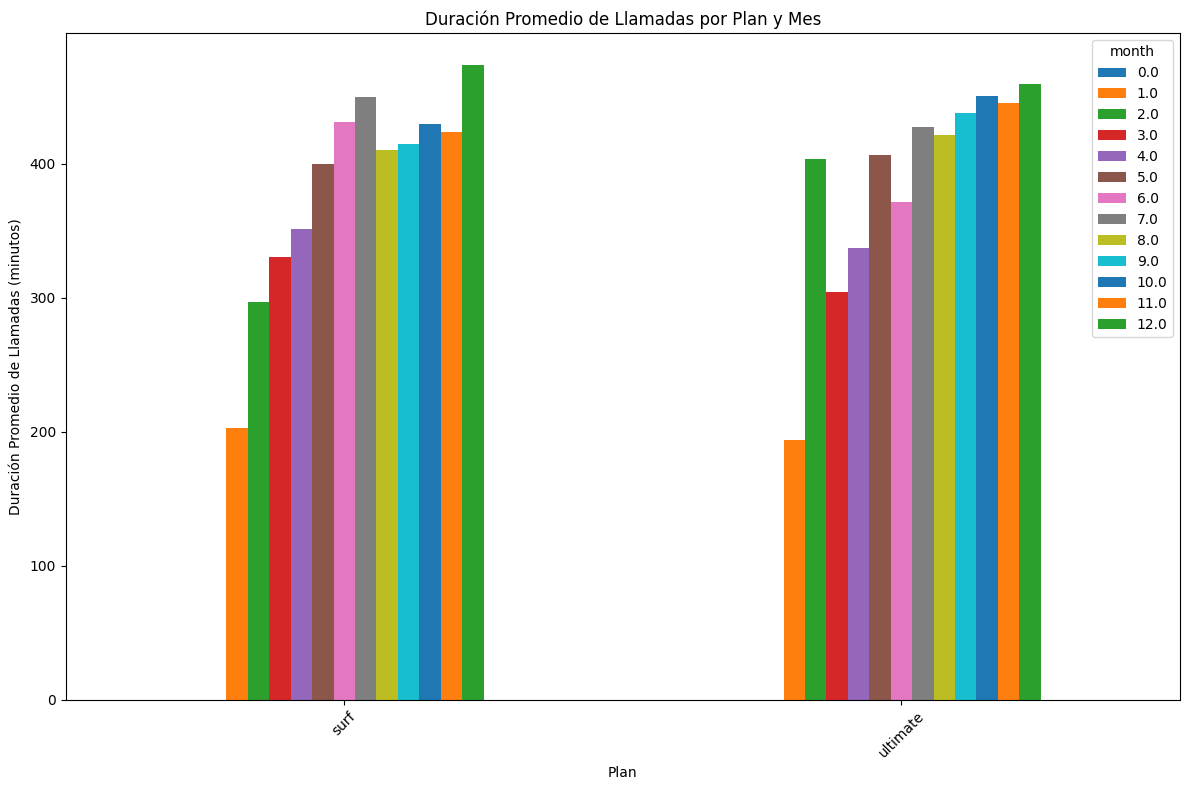

In [95]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
prom_duracion_mes = fct_sales.groupby(['plan','month'])['used_minutes'].mean().unstack()
prom_duracion_mes.plot(kind='bar',figsize=(12, 8),title='Duración Promedio de Llamadas por Plan y Mes',xlabel='Plan', ylabel='Duración Promedio de Llamadas (minutos)',legend=True, rot=45)
plt.tight_layout()
plt.show()


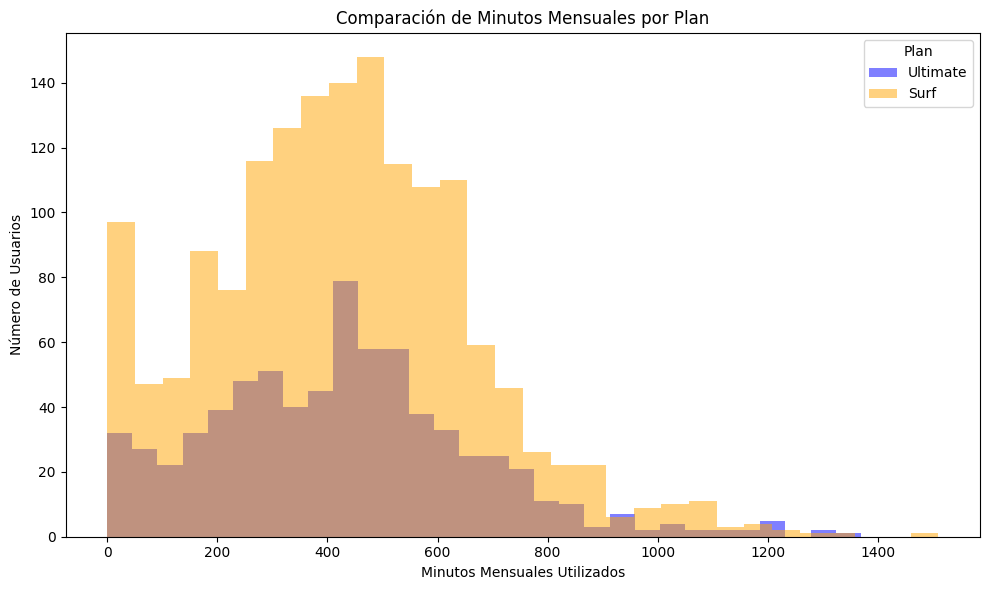

In [96]:
minutos_plan_ultimate = fct_sales[fct_sales['plan'] == 'ultimate']['used_minutes']
minutos_plan_surf = fct_sales[fct_sales['plan'] == 'surf']['used_minutes']

plt.figure(figsize=(10, 6))
plt.hist(minutos_plan_ultimate, bins=30, alpha=0.5, label='Ultimate', color='blue')
plt.hist(minutos_plan_surf, bins=30, alpha=0.5, label='Surf', color='orange')
plt.title('Comparación de Minutos Mensuales por Plan')
plt.xlabel('Minutos Mensuales Utilizados')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


In [97]:
# Calcula la media y la varianza de la duración mensual de llamadas.
prom_duracion_mes = fct_sales.groupby(['plan','month'])['used_minutes'].mean()
varianza_llamadas = fct_sales['used_minutes'].var()

print('Varianza de la duración de las llamadas:', varianza_llamadas)
print('Promedio de duración por mes y plan:', prom_duracion_mes)


Varianza de la duración de las llamadas: 56401.63979518273
Promedio de duración por mes y plan: plan      month
surf      0.0        0.000000
          1.0      203.000000
          2.0      297.000000
          3.0      330.000000
          4.0      351.540000
          5.0      399.584416
          6.0      431.298969
          7.0      449.983471
          8.0      410.111111
          9.0      414.226804
          10.0     429.729958
          11.0     423.325088
          12.0     473.836478
ultimate  0.0        0.000000
          1.0      193.500000
          2.0      403.142857
          3.0      304.250000
          4.0      336.857143
          5.0      406.241379
          6.0      370.957447
          7.0      427.067797
          8.0      421.436620
          9.0      437.511628
          10.0     450.735849
          11.0     445.196850
          12.0     459.099338
Name: used_minutes, dtype: float64


<AxesSubplot:xlabel='used_minutes'>

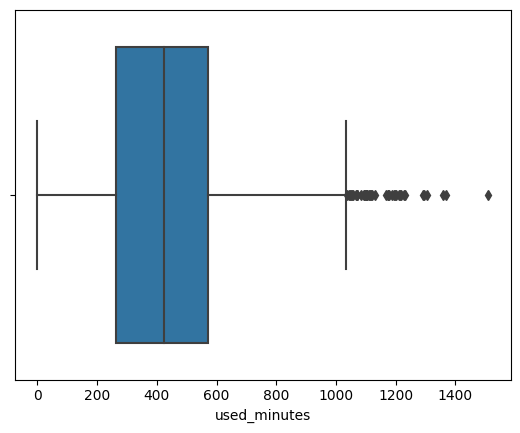

In [98]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(fct_sales['used_minutes'])


Podemos observar un comportamiento diferenciado de los usuarios de acuerdo al plan que utiliza ya que podemos observar que aquellos en el plan surf tienen una utilización con mayor distribución cargada a la derecha por lo que podemos inferir que recurren en cargos extra con mayor frecuencia que permiten una mayor rentabilidad del usuario.

### Mensajes

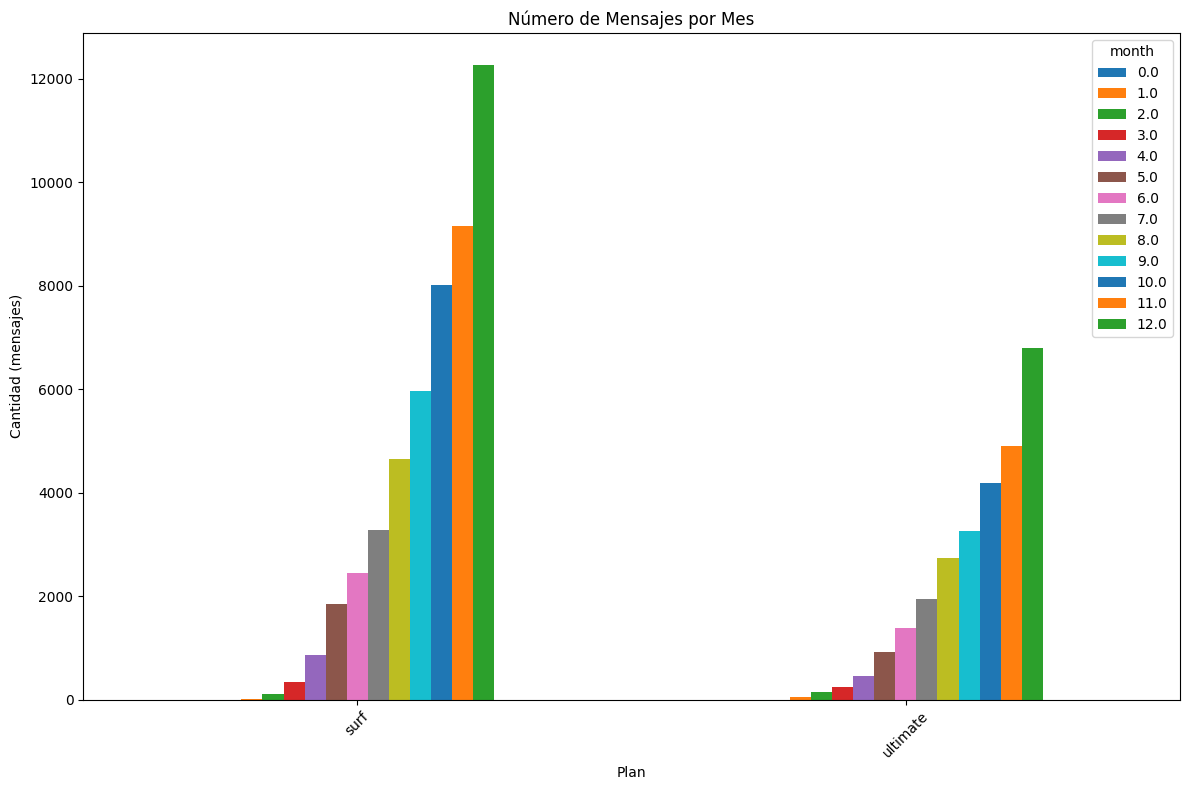

In [99]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
numero_mensajes_mes = fct_sales.groupby(['plan','month'])['quantity_messages'].sum().unstack()
numero_mensajes_mes.plot(kind='bar',figsize=(12, 8),title='Número de Mensajes por Mes',xlabel='Plan', ylabel='Cantidad (mensajes)',legend=True, rot=45)
plt.tight_layout()
plt.show()


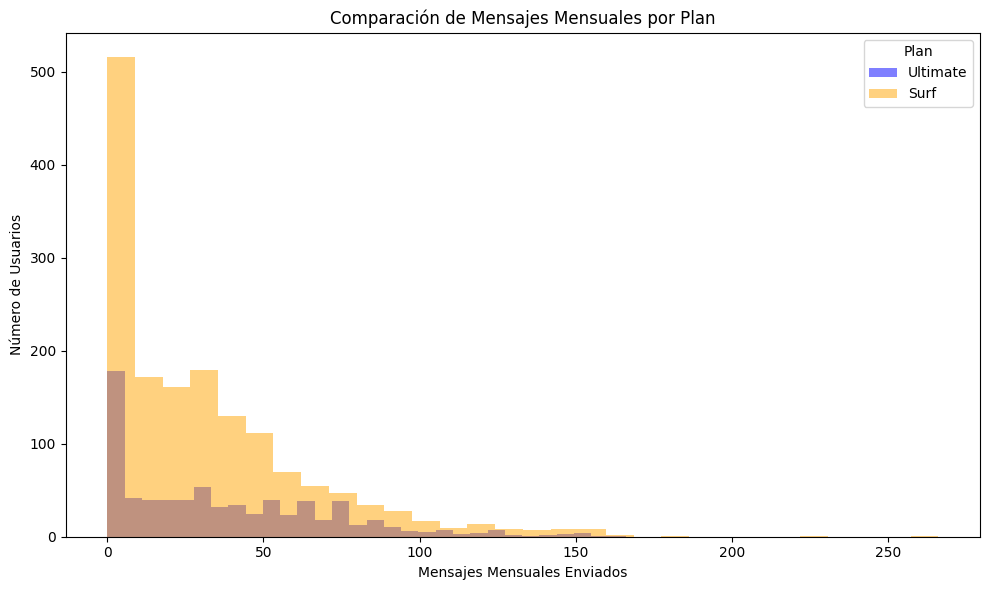

In [100]:
msg_ultimate = fct_sales[fct_sales['plan'] == 'ultimate']['quantity_messages']
msg_surf = fct_sales[fct_sales['plan'] == 'surf']['quantity_messages']

plt.figure(figsize=(10, 6))
plt.hist(msg_ultimate, bins=30, alpha=0.5, label='Ultimate', color='blue')
plt.hist(msg_surf, bins=30, alpha=0.5, label='Surf', color='orange')
plt.title('Comparación de Mensajes Mensuales por Plan')
plt.xlabel('Mensajes Mensuales Enviados')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='quantity_messages'>

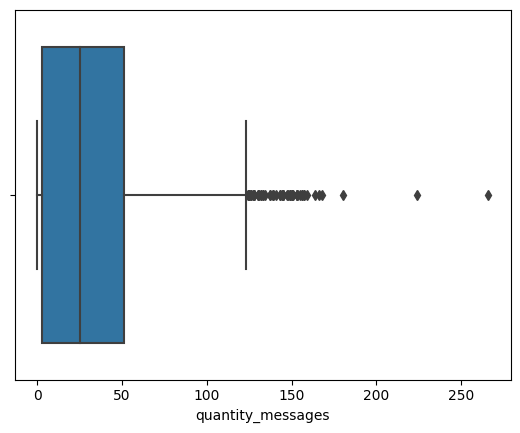

In [101]:
sns.boxplot(fct_sales['quantity_messages'])

Podemos observar que aquellos con el plan surf envian una mayor cantidad de mensajes en promedio por mes, sin embargo de acuerdo a los esquemas tarifarios esto necesariamente implica que generan mayor rentabilidad.

### Internet

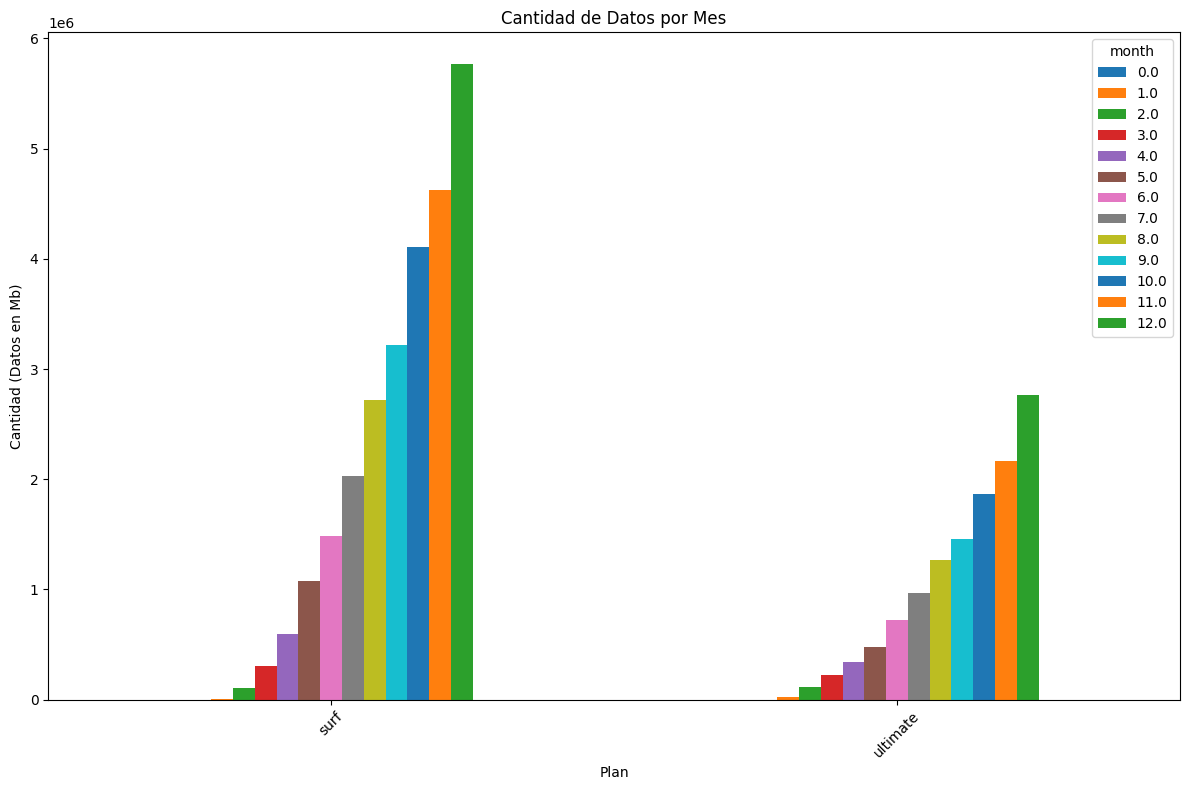

In [102]:
# Comparamos la cantidad de datos que tienden a utilizar cada mes los usuarios de cada plan.
numero_mensajes_mes = fct_sales.groupby(['plan','month'])['mb_used'].sum().unstack()
numero_mensajes_mes.plot(kind='bar',figsize=(12, 8),title='Cantidad de Datos por Mes',xlabel='Plan', ylabel='Cantidad (Datos en Mb)',legend=True, rot=45)
plt.tight_layout()
plt.show()


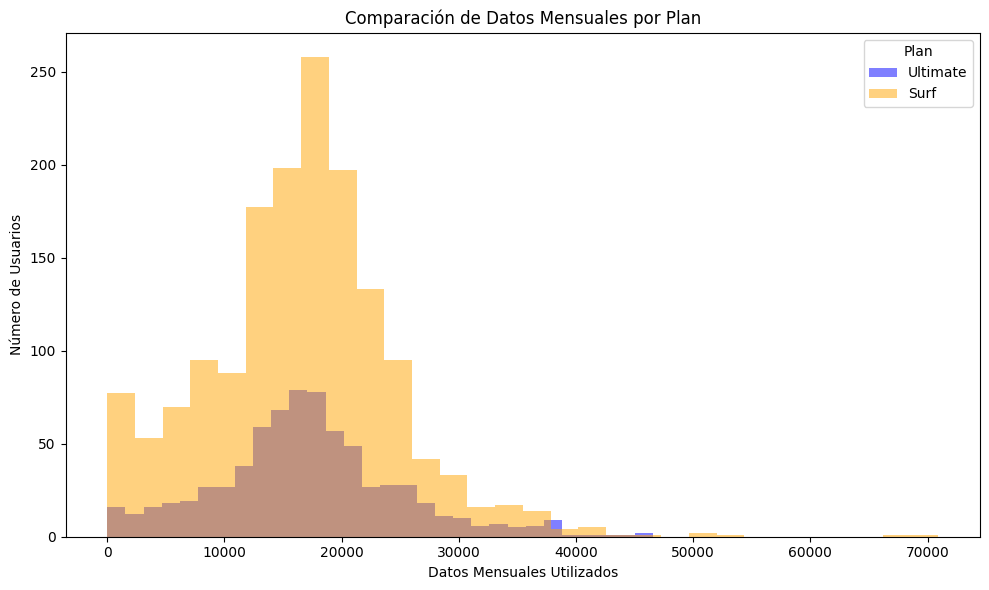

In [103]:
# Comparamos en histograma la cantidad de datos que tienden a utilizar cada mes los usuarios de cada plan.
mb_ultimate = fct_sales[fct_sales['plan'] == 'ultimate']['mb_used']
mb_surf = fct_sales[fct_sales['plan'] == 'surf']['mb_used']

plt.figure(figsize=(10, 6))
plt.hist(mb_ultimate, bins=30, alpha=0.5, label='Ultimate', color='blue')
plt.hist(mb_surf, bins=30, alpha=0.5, label='Surf', color='orange')
plt.title('Comparación de Datos Mensuales por Plan')
plt.xlabel('Datos Mensuales Utilizados')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='mb_used'>

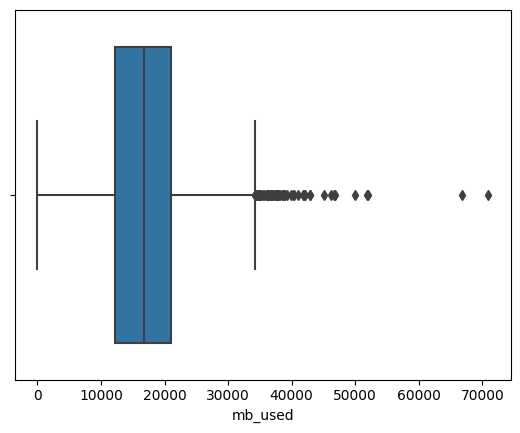

In [104]:
sns.boxplot(fct_sales['mb_used'])

Nuevamente todo parece indicar que el plan surf envia una mayor cantidad de mensajes en promedio por mes, sin embargo de acuerdo a los esquemas tarifarios esto necesariamente implica que generan mayor rentabilidad.

## Ingreso

Aprovechamos los cálculos previamente realizados y agregados a la columna de rentabilidad para mostrar de manera más sencilla las comparaciones gráficas

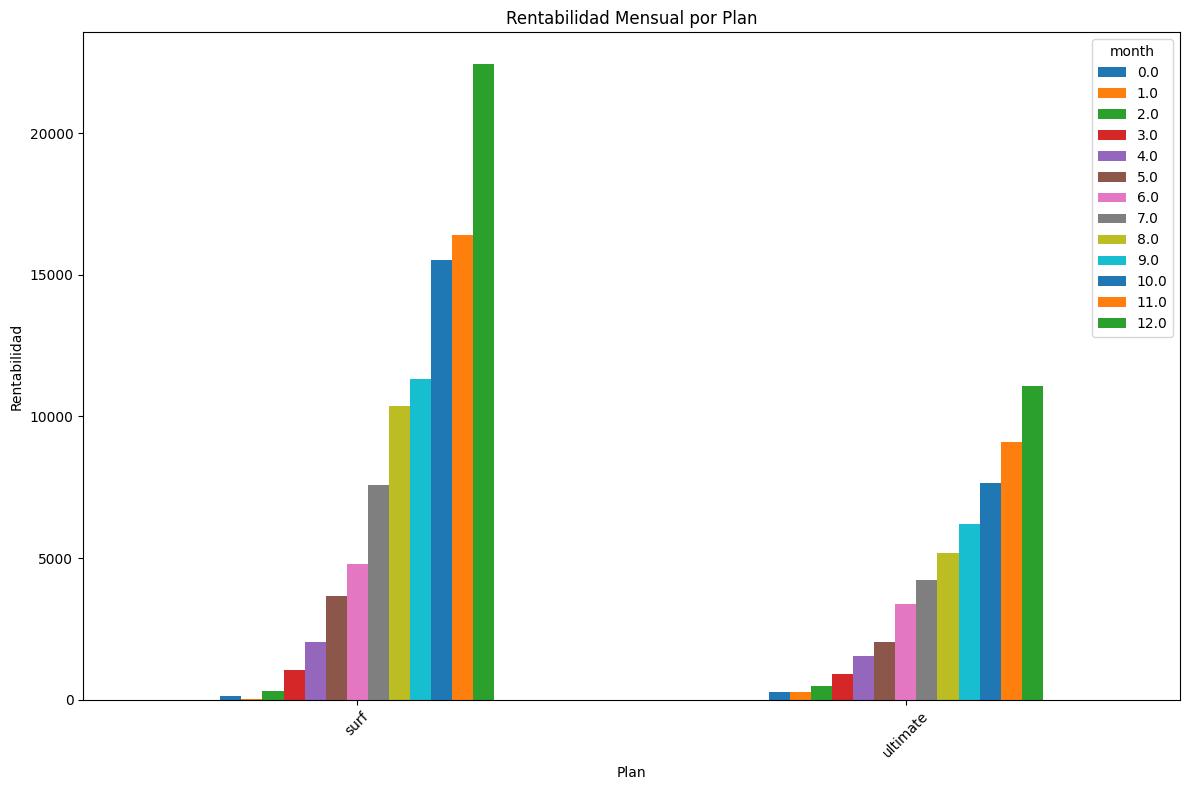

In [105]:
#Comparación de barras de rentabilidad por mes y por plan
rentabilidad = fct_sales.groupby(['plan','month'])['rentabilidad_mensual'].sum().unstack()
rentabilidad.plot(kind='bar',figsize=(12, 8),title='Rentabilidad Mensual por Plan',xlabel='Plan', ylabel='Rentabilidad',legend=True, rot=45)
plt.tight_layout()
plt.show()


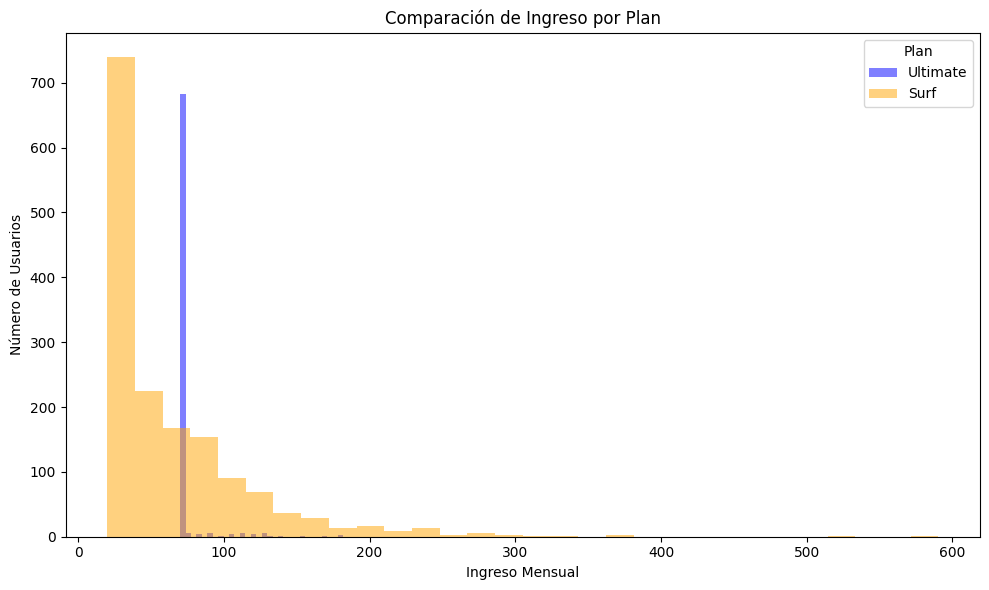

In [106]:
#Comparación histograma de rentabilidad.
renta_ultimate = fct_sales[fct_sales['plan'] == 'ultimate']['rentabilidad_mensual']
renta_surf = fct_sales[fct_sales['plan'] == 'surf']['rentabilidad_mensual']

plt.figure(figsize=(10, 6))
plt.hist(renta_ultimate, bins=30, alpha=0.5, label='Ultimate', color='blue')
plt.hist(renta_surf, bins=30, alpha=0.5, label='Surf', color='orange')
plt.title('Comparación de Ingreso por Plan')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='rentabilidad_mensual'>

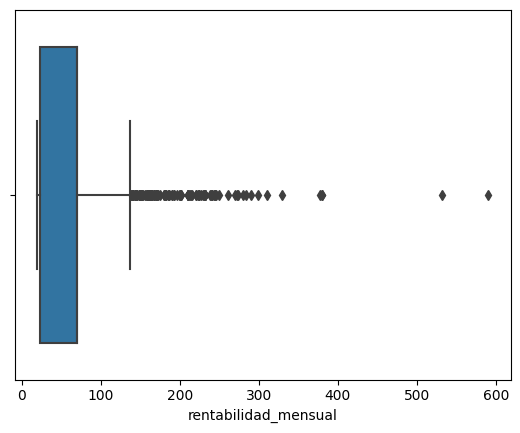

In [107]:
#Gráfica de bigotes.
sns.boxplot(fct_sales['rentabilidad_mensual'])

Podemos ver que la mayoría de usuarios prefiere el plan surf y a pesar de ser un plan más básico o barato al rebasar sus cuotas de uso e incurrir en gastos extra, la rentabilidad de dicho plan es mayor que aquellos en el plan ultimate.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

Probaremos la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [108]:
# Prueba las hipótesis.
#En primera instancia obtenemos el promedio de ingresos tanto de Ultimate como de Surf.
mean_ultimate = fct_sales[fct_sales['plan'] == 'ultimate']['rentabilidad_mensual'].mean()
mean_surf = fct_sales[fct_sales['plan'] == 'surf']['rentabilidad_mensual'].mean()
print(mean_ultimate)
print(mean_surf)

#Si bien nos queda claro que los promedios son distintos para hacer las hipótesis estadísticas primero transformaremos los datos de cada plan a una Series, para despues utilizar la función donde conocemos las medias de dos poblaciones estadísticas, siendo la hipótesis nula que no hay mucha diferencia en ingreso por plan y la alternativa que sí la hay.
ultimate_values = fct_sales[fct_sales['plan'] == 'ultimate']['rentabilidad_mensual']
surf_values = fct_sales[fct_sales['plan'] == 'surf']['rentabilidad_mensual']

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(ultimate_values, surf_values,equal_var=False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

72.3011049723757
60.551728942368584
valor p:  1.218411585212325e-15
Rechazamos la hipótesis nula


Hemos rechazado la hipótesis de que los ingresos son similares por lo que se confirma que un plan representa un mayor ingreso que el otro. 

Probaremos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones por lo que haremos algo similar al paso anterior.

Nuestra hipótesis nula es que no hay mucha diferencia y la alternativa es que si la hay, para hacer lo anterior primero tenemos que pasar valores que nos permitan extraer los datos de los usuarios del área NY-NJ

In [109]:
# Prueba las hipótesis
nynj_values = fct_sales[fct_sales['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['rentabilidad_mensual']
other_values = fct_sales[fct_sales['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['rentabilidad_mensual']

results = st.ttest_ind(nynj_values, other_values,equal_var=False) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.03870322661292962
Rechazamos la hipótesis nula


Hemos rechazado la hipótesis de que los ingresos son similares por lo que se confirma que hay diferencia estadísticamente representativa entre la rentabilidad de una población regional en comparación que el resto del país.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo desarrollando las pruebas de hipótesis. Solamente te recomendaría que para robustecer el análisis desarrolles una prueba de levene que te ayude a probar el supuesto de las varianzas iguales.

## Conclusión general

Como conclusión general podemos afirmar que un plan tarifario representa una mayor rentabilidad que otro y dicha afirmación también la hemos confirmado con métodos estadísticos al confirmar que la diferencia en ingreso de acuerdo a las muestras es estadísticamente significativa. De acuerdo a nuestra gráficas y lo que podemos observar si bien el plan surf se podria esperar menos ingreso en comparación con últimate por el plan tarifario, parace que es necesario considerar los efectos de los "cargos recurrentes" al rebasar el limite permitido por el plan, además de la cantidad de usuarios que utilizan cada plan. Para poder determinar lo anterior fue necesario hacer un extenso data wrangling de los datos procurando varias tablas intermedias con especial atención de cómo se ligan las tablas originales, para despues crear una tabla final de hechos que incluyera cálculos de rentabilidad de cada plan.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Andrés, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:



*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de varianzaas iguales de las pruebas de hipótesis mediante la prueba de levene
    
</div>